# K-Means clustering using Tensorflow

# Importing Libraries:


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [22]:
from sklearn.cluster import KMeans

In [26]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Setting Parameters:

points_n: Number of data points is increased to 300.

clusters_n: Number of clusters is changed to 4.

iteration_n: Number of iterations for the k-means algorithm
(unchanged at 100).

seed: Random seed for reproducibility.

In [15]:
points_n = 300
clusters_n = 4
iteration_n = 100
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)


# Generating Random 2D Data Points:

np.random.uniform(0, 15, (points_n, 2)): Randomly generates 300 data points in a 2D space between 0 and 15.

In [16]:
points = np.random.uniform(0, 15, (points_n, 2))

# Initializing Centroids:
centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1]): Shuffles the generated points and selects the first 4 points as initial centroids.

In [17]:
centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])


# Plotting the Data and Initial Centroids:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5): Scatter plot of the generated data points.

plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15): Plotting the initial centroids as black 'x' markers.


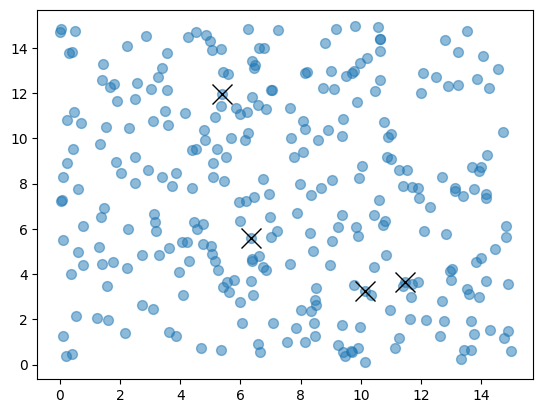

In [19]:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()


# Performing the k-means clustering using scikit-learn


In [23]:
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(points)
labels = kmeans.labels_
centroids_sklearn = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting the data points with colors corresponding to clusters

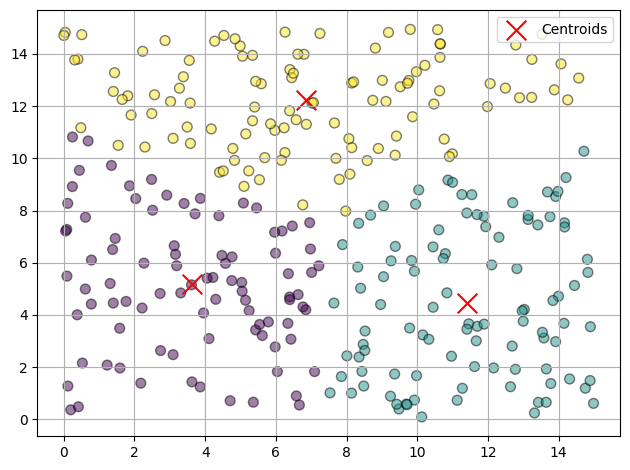

In [25]:
plt.scatter(points[:, 0], points[:, 1], c=labels, s=50, alpha=0.5, cmap='viridis', edgecolors='k')
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# Calculating Sum of Squared Errors (SSE):
Defining an SSE function that calculates the sum of squared errors for each point with its assigned centroid.

Running the algorithm for different numbers of clusters (1 to 10) and plotting the SSE.

In [30]:
def sse(points, centroids):
    sse1 = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:,None])), 2).numpy()
    s = np.argmin(sse1, 0)
    distance = 0
    for i in range(len(points)):
      distance += sse1[s[i], i]

    return distance/len(points)

Text(0.5, 0, 'Number of clusters')

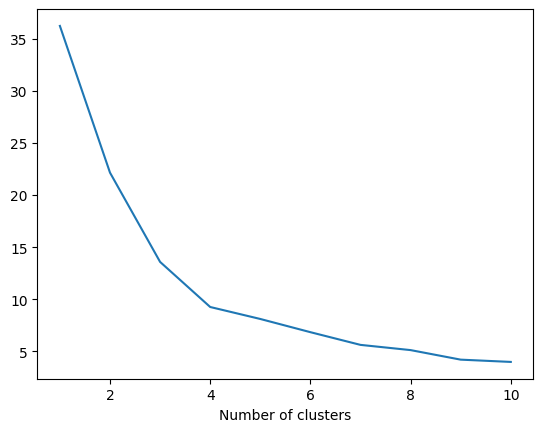

In [32]:
w_sse = []
for n in range(1, 11):
  centroids = tf.slice(tf.random.shuffle(points), [0, 0], [n, -1])
  for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)

  w_sse.append(sse(points, centroids))
plt.plot(range(1, 11),w_sse)
plt.xlabel('Number of clusters')

# Silhouette Diagram

**The silhouette coefficient or score** is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.6395788489031059


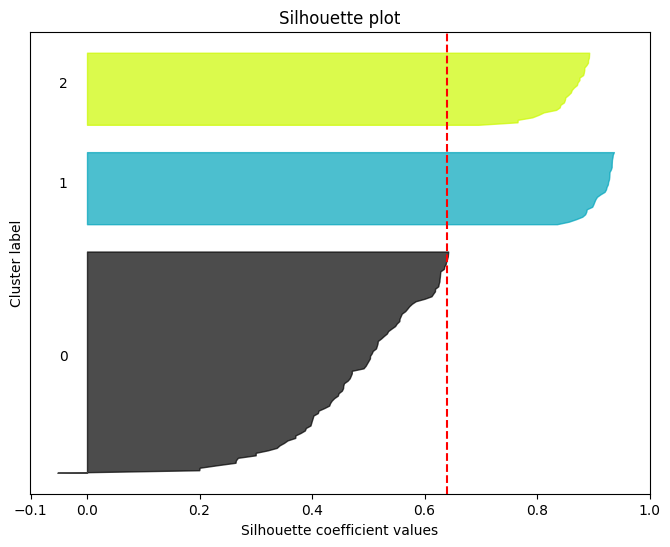

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.6797269304425075


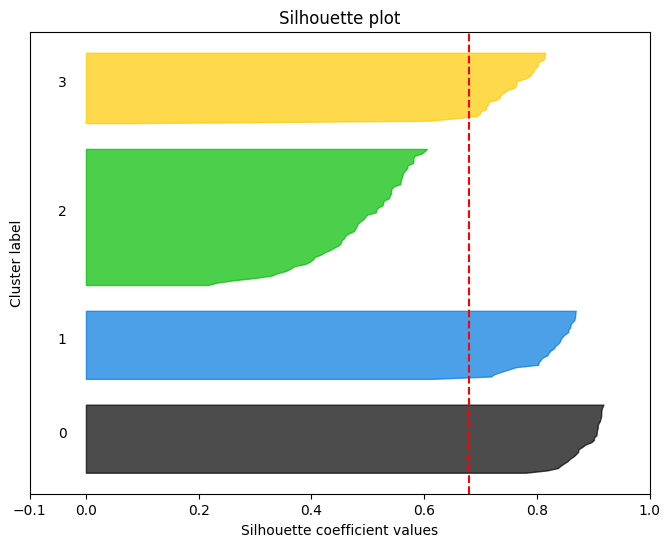

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.7559309654447394


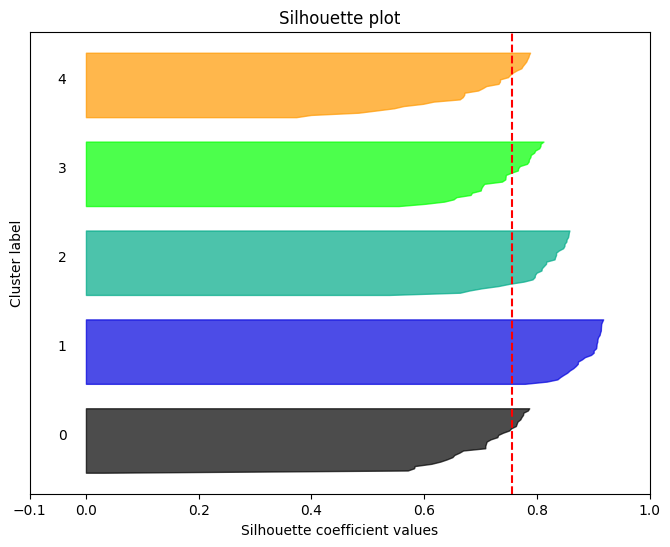

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.673746752406013


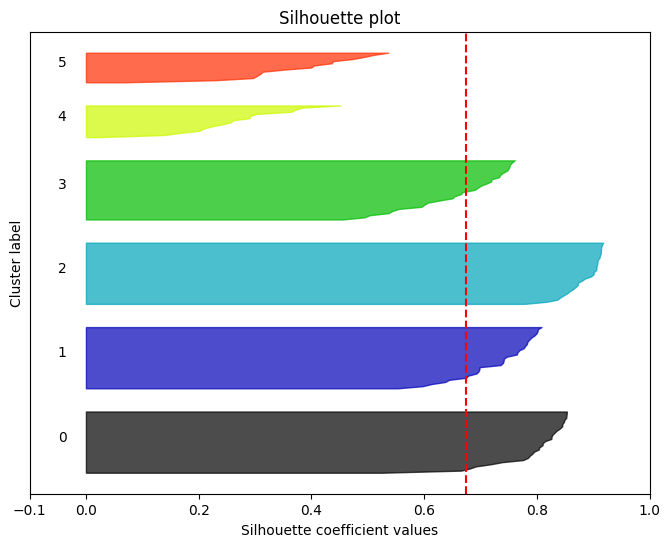

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.44772656258809407


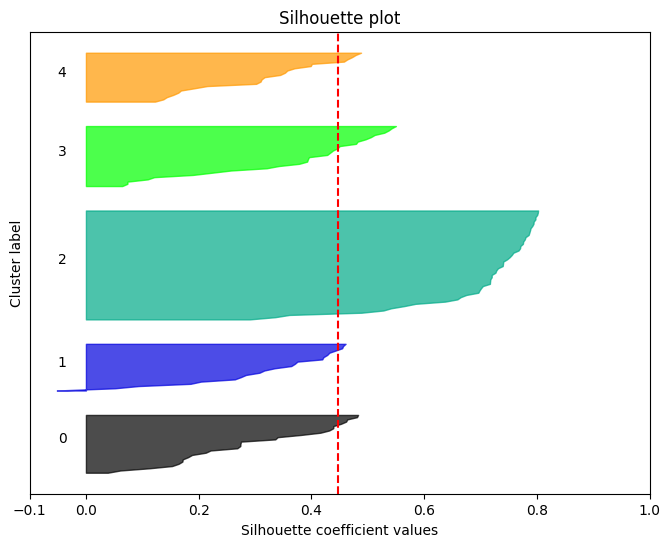

In [27]:
def plot_silhouette(X, cluster_labels, n_clusters):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Generate sample data with 5 clusters
X, y = make_blobs(n_samples=150, n_features=2, centers=5, cluster_std=0.5, shuffle=True, random_state=0)

# Apply the k-means algorithm for different numbers of clusters
cluster_numbers = [3, 4, 5, 6]

for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    # Plot the silhouette plot for each number of clusters
    plot_silhouette(X, cluster_labels, n_clusters)
    plt.show()

# Compare to a "bad" clustering case with a different number of centers
bad_X, bad_y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
bad_kmeans = KMeans(n_clusters=5, random_state=0)
bad_cluster_labels = bad_kmeans.fit_predict(bad_X)

plot_silhouette(bad_X, bad_cluster_labels, 5)
plt.show()


# Conclusion:

Higher silhouette scores generally indicate better-defined clusters, with values closer to 1 indicating stronger cohesion within clusters and better separation between clusters. The optimal number of clusters can be identified by looking for the maximum silhouette score, which, in this case, occurs when the number of clusters is set to 5. The "bad" clustering case with 5 clusters has a significantly lower silhouette score, indicating poorer cluster quality.